# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

#### Загружаем данные из csv-файла в датафрейм c помощью библиотеки pandas

In [1]:
import pandas as pd
import numpy as np 

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

#### Изучаем общую информацию о полученном датафрейме.

In [3]:
# команда для увеличения максимального количества отображающихся столбцов:
pd.set_option('display.max_columns', None)

In [4]:
# выводим первые 20 строчек датафрейма data на экран:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
# выводим основную информацию о датафрейме:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Выполните предобработку данных

#### Удаление пропусков

In [6]:
# определяем в каких столбцах есть пропуски:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
# заполняем пропущенные значения в столбце 'is_apartment' на True, 
# поскольку анализ проводится для квартир:
data['is_apartment'] = data['is_apartment'].fillna(True)

C:\Users\klime\AppData\Local\Temp\ipykernel_179672\4210453315.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(True)


In [8]:
# заполняем пропущенные значения в столбце 'balcony' на 0, 
# поскольку, если количество балконов не указано, скорее всего их нет:
data['balcony'] = data['balcony'].fillna(0)

In [9]:
# заполняем пропущенные значения в столбцах 'parks_around3000'
# на 0, поскольку, если количество парков на расстоянии до 3000м не указано, скорее всего их нет:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [10]:
# заполняем пропущенные значения в столбцах 'ponds_around3000'
# на 0, поскольку, если количество прудов на расстоянии до 3000м не указано, скорее всего их нет:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Проверяем заполнены ли вышеуказанные пропуски:

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Вывод:**\
Пропуски в данных могли возникнуть из-за того, что:
1. Продавец не указал необходимую информацию или ошибся при вводе данных.
2. Возникли технические неполадки в автоматическом получении информации на основе картографических данных.

#### Изменение типов данных

In [12]:
# изменение типа данных в столбцах 'parks_around3000', 'parks_nearest' на int:
data['parks_around3000'] = data['parks_around3000'].astype(int)

In [13]:
# изменение типа данных в столбцах 'ponds_around3000', 'ponds_nearest' на int:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [14]:
# преобразование даты создания объявления в столбце 'first_day_exposition':
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')

**Вывод:**  

1. Изменяем тип данных в столбцах 'parks_around3000', 'ponds_around3000' с float на int, поскольку количество парков и прудов обычно указывается в целых числах.
2. Преобразовываем столбец 'first_day_exposition' с object на datetime для отображения столбца как даты, а не строки.

#### Обработка дубликатов

In [15]:
# уникальные значения в столбце 'locality_name':
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
# устраняем неявные дубликаты по поселку Мурино:
data['locality_name'] = (data['locality_name']
                         .str.replace('ё','е')
                         .replace(['Мурино', 'поселок Рябово'],
                                  ['поселок Мурино', 'поселок городского типа Рябово'])
)

In [17]:
# проверяем уникальные значения в столбце 'locality_name':
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

### Добавьте в таблицу новые столбцы

In [18]:
# добавляем столбец c ценой одного квадратного метра:
data['price_per_1m'] = round((data['last_price'] / data['total_area']), 2)

In [19]:
# добавляем столбец с днем недели публикации объявления:
data['day_exposition'] = data['first_day_exposition'].apply(lambda x: x.weekday())

In [20]:
# добавляем столбец с месяцем публикации объявления:
data['month_exposition'] = data['first_day_exposition'].dt.month

In [21]:
# добавляем столбец с годом публикации объявления:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [22]:
# добавляем столбец с типом этажа квартиры:
data['floor_apartment_type'] = 'другой'

In [23]:
data.loc[data['floor'] == 1, 'floor_apartment_type'] = 'первый'  

In [24]:
data.loc[data['floor'] == data['floors_total'], 'floor_apartment_type'] = 'последний'

In [25]:
# добавляем столбец с расстоянием до центра города в км:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

### Проведите исследовательский анализ данных

#### Изучаем параметры объектов и строим отдельные гистограммы для каждого из этих параметров

##### Параметр "общая площадь"

In [26]:
# вычисление межквартильного размаха:  
Q1 = data['total_area'].quantile(0.25)  
Q3 = data['total_area'].quantile(0.75)  
IQR = Q3 - Q1

# границы для аномалий:
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

In [27]:
# удаляем аномальные значения:
data = data[(data['total_area'] >= lower_bound) & (data['total_area'] <= upper_bound)]

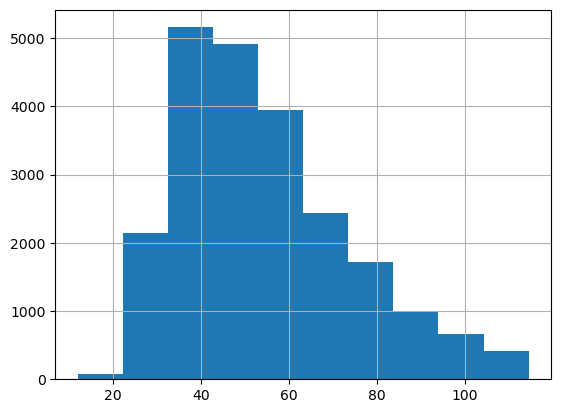

In [28]:
# строим гистограмму для параметра общая площадь:
data['total_area'].hist();

##### Параметр "жилая площадь"

В столбце 'жилая площадь' имеются пропуски. Заполним их цифрами из соотношения суммы всех жилых площадей к сумме всех общих площадей.

In [29]:
# рассчитаем соотношение суммы жилых площадей к сумме общих площадей:
living_per_total = data['living_area'].sum()/data['total_area'].sum()

In [30]:
# заполняем пропуски:
data['living_area'] = data['living_area'].fillna(data['total_area']*living_per_total)

In [31]:
# вычисление межквартильного размаха:  
Q1 = data['living_area'].quantile(0.25)  
Q3 = data['living_area'].quantile(0.75)  
IQR = Q3 - Q1  

# границы для аномалий:
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

In [32]:
# удаляем аномальные значения:
data = data[(data['living_area'] >= lower_bound) & (data['living_area'] <= upper_bound)]

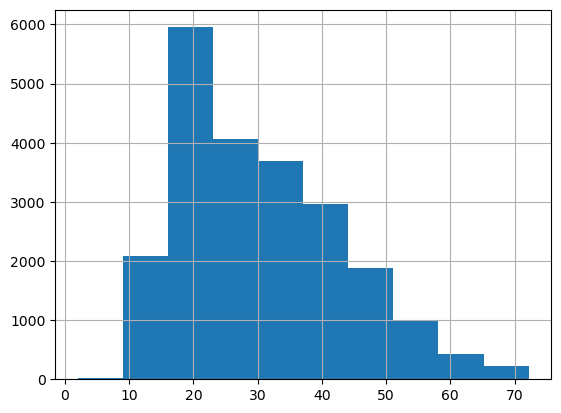

In [33]:
# строим гистограмму для параметра жилая площадь:
data['living_area'].hist();

##### Параметр "площадь кухни"

В столбце 'площадь кухни' имеются пропуски. Заполним их цифрами из соотношения суммы всех площадей кухни к сумме всех общих площадей.

In [34]:
# рассчитаем соотношение суммы площадей кухни к сумме общих площадей:
kitchen_per_total = data['kitchen_area'].sum()/data['total_area'].sum()

In [35]:
# заполняем пропуски:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*kitchen_per_total)

In [36]:
# вычисление межквартильного размаха:  
Q1 = data['kitchen_area'].quantile(0.25)  
Q3 = data['kitchen_area'].quantile(0.75)  
IQR = Q3 - Q1  

# границы для аномалий:
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

In [37]:
# удаляем аномальные значения:
data = data[(data['kitchen_area'] >= lower_bound) & (data['kitchen_area'] <= upper_bound)]

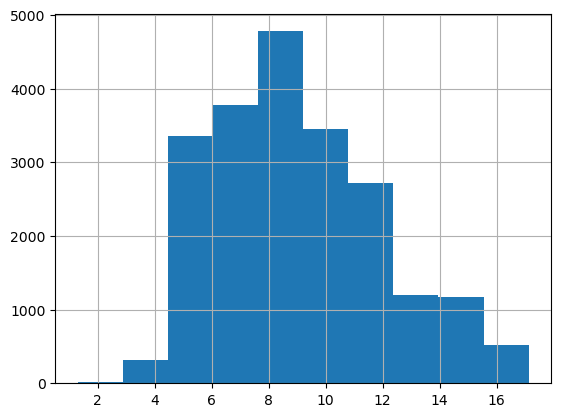

In [38]:
# строим гистограмму для параметра площадь кухни:
data['kitchen_area'].hist();

##### Параметр "цена объекта"

In [39]:
# для наглядности рассчитаем цены квартир в млн.:
data['last_price_mln'] = data['last_price'] / 1000000

In [40]:
data['last_price_mln']

1        3.350
2        5.196
5        2.890
6        3.700
8        2.900
         ...  
23692    1.350
23693    4.600
23695    3.100
23696    2.500
23698    1.350
Name: last_price_mln, Length: 21310, dtype: float64

In [41]:
data.isna().sum()

total_images                  0
last_price                    0
total_area                    0
first_day_exposition          0
rooms                         0
ceiling_height             8381
floors_total                 76
living_area                   0
floor                         0
is_apartment                  0
studio                        0
open_plan                     0
kitchen_area                  0
balcony                       0
locality_name                42
airports_nearest           5343
cityCenters_nearest        5328
parks_around3000              0
parks_nearest             14566
ponds_around3000              0
ponds_nearest             13594
days_exposition            2648
price_per_1m                  0
day_exposition                0
month_exposition              0
year_exposition               0
floor_apartment_type          0
cityCenters_nearest_km     5328
last_price_mln                0
dtype: int64

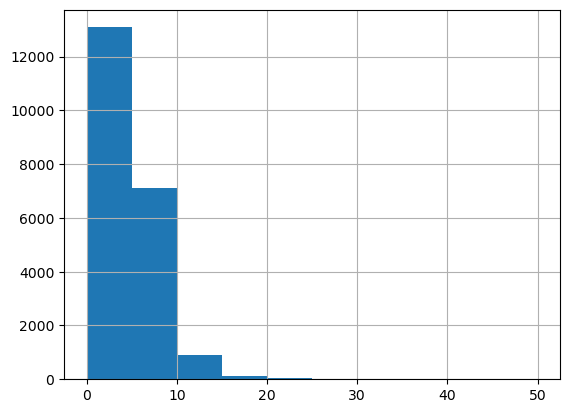

In [42]:
# строим гистограмму для параметра цена объекта:
data['last_price_mln'].hist(range=(0, 50));

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
data['last_price_mln']

1        3.350
2        5.196
5        2.890
6        3.700
8        2.900
         ...  
23692    1.350
23693    4.600
23695    3.100
23696    2.500
23698    1.350
Name: last_price_mln, Length: 21310, dtype: float64

##### Параметр "количество комнат"

In [45]:
# вычисление межквартильного размаха:  
Q1 = data['rooms'].quantile(0.25)  
Q3 = data['rooms'].quantile(0.75)  
IQR = Q3 - Q1  

# границы для аномалий:
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

In [46]:
# удаляем аномальные значения:
data = data[(data['rooms'] >= lower_bound) & (data['rooms'] <= upper_bound)]

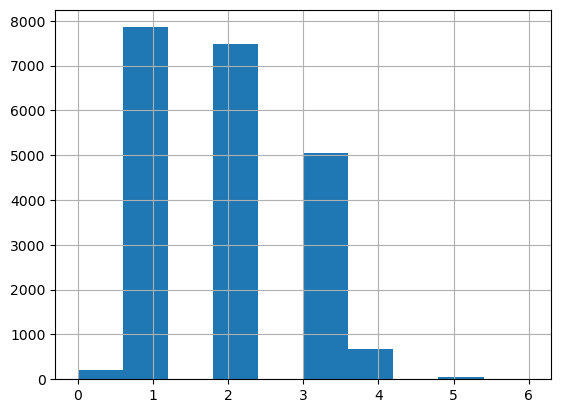

In [47]:
# строим гистограмму для параметра количество комнат:
data['rooms'].hist();

In [48]:
data['rooms'].unique()

array([1, 2, 3, 4, 0, 5, 6], dtype=int64)

##### Параметр "высота потолков"

In [49]:
# замена NaN на медианное значение в 'ceiling_height':
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [50]:
# просмотр значений 'ceiling_height':
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
5807      27.0
5246      27.0
21824     27.0
17857     27.0
4876      27.0
20478     27.0
10773     27.0
5669      26.0
9379      25.0
6246      25.0
4643      25.0
355       25.0
14382     25.0
11285     25.0
18545     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
17442      8.0
3474       8.0
21227      5.8
12628      5.3
Name: ceiling_height, dtype: float64

In [51]:
# замена явных ошибок в 'ceiling_height', перенос запятой:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

In [52]:
# вычисление межквартильного размаха:  
Q1 = data['ceiling_height'].quantile(0.25)  
Q3 = data['ceiling_height'].quantile(0.75)  
IQR = Q3 - Q1  

# границы для аномалий:
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR

In [53]:
# удаляем аномальные значения:
data = data[(data['ceiling_height'] >= lower_bound) & (data['ceiling_height'] <= upper_bound)]

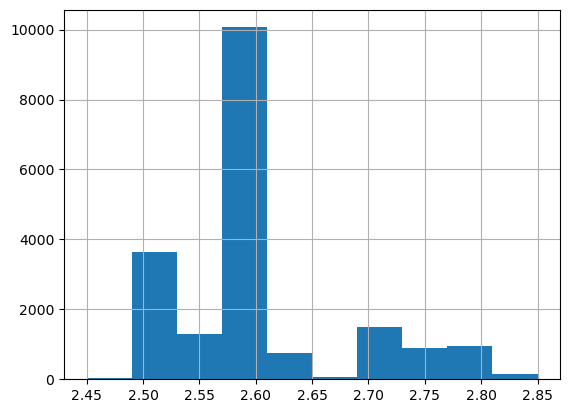

In [54]:
# строим гистограмму:
data['ceiling_height'].hist();

##### Параметр "тип этажа квартиры («первый», «последний», «другой»)"

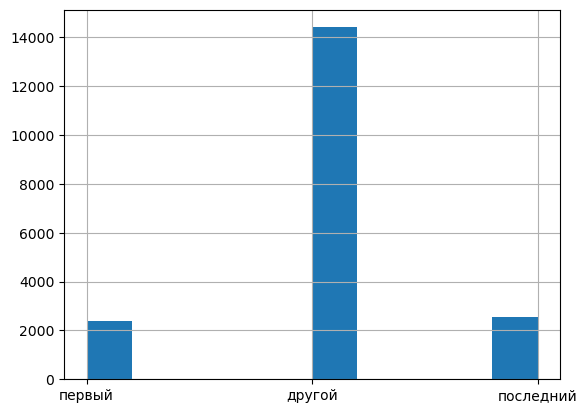

In [55]:
# строим гистограмму:
data['floor_apartment_type'].hist();

#####  Параметр "общее количество этажей в доме"

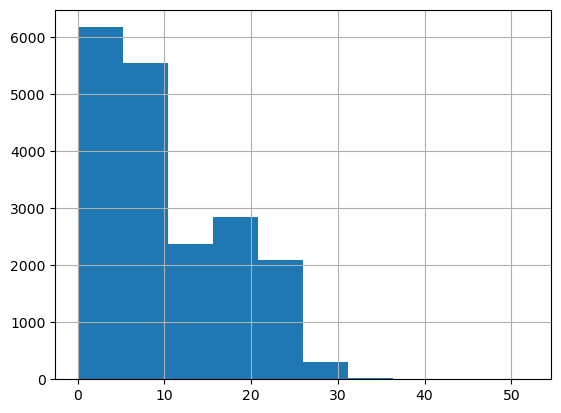

In [56]:
# удаляем строки с пустыми значениями:
data['floors_total'] = data['floors_total'].fillna(0)

# строим гистограмму:
data['floors_total'].hist();

#####  Параметр "расстояние до центра города в метрах"

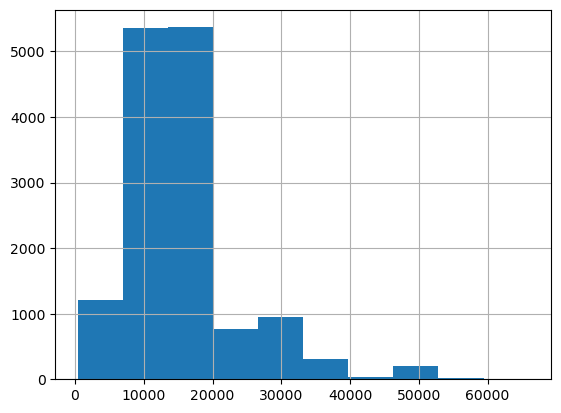

In [57]:
# строим гистограмму:
data['cityCenters_nearest'].hist();

#####  Параметр "расстояние до ближайшего парка"

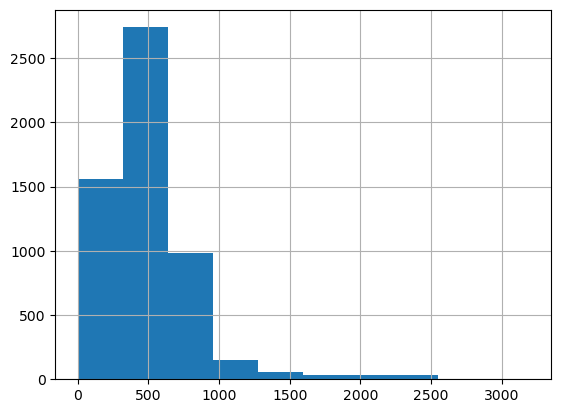

In [58]:
# строим гистограмму:
data['parks_nearest'].hist();

**Вывод:**  

Больше всего квартир с:
1. общей площадью до 30-45м2.
2. жилой площадью до 15-25м2.
3. площадью кухни до 7-9м2.
4. ценой до 5млн.
5. количеством комнат 1 комната.
6. высотой потолков 2,6м.
7. типом этажа квартиры "другой".
8. общим количеством этажей до 5.
9. расстоянием до центра города до 15000м.
10. расстоянием до ближайшего парка до 250м.

In [59]:
#код ревьюера
data.ceiling_height.max()

2.85

#### Изучаем как быстро продавались квартиры

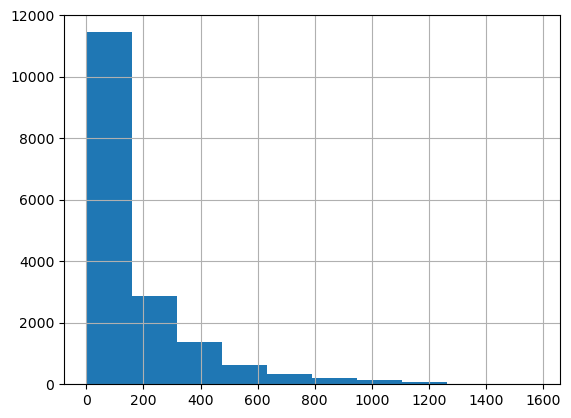

In [60]:
# строим гистограмму:
data['days_exposition'].hist();

In [61]:
# считаем среднее значение:
data['days_exposition'].mean()

167.71797272780478

In [62]:
# считаем медиану:
data['days_exposition'].median()

89.00000000000001

**Вывод:**  
Обычно время продажи квартиры составляет до 180 дней.\
Продажи квартиры до 90 дней можно считать быстрыми.\
Продажи квартиры от 180 дней можно считать необычно долгими.


#### Определяем факторы, которые больше всего влияют на общую (полную) стоимость объекта

#####  Зависимость цены от общей площади

In [63]:
# делим на категории общие площади квартир:
pd.qcut(data['total_area'], 4)

1          (38.0, 47.0]
2          (47.0, 61.7]
5        (11.999, 38.0]
6        (11.999, 38.0]
8        (11.999, 38.0]
              ...      
23692    (11.999, 38.0]
23693     (61.7, 114.2]
23695      (47.0, 61.7]
23696      (47.0, 61.7]
23698    (11.999, 38.0]
Name: total_area, Length: 19358, dtype: category
Categories (4, interval[float64, right]): [(11.999, 38.0] < (38.0, 47.0] < (47.0, 61.7] < (61.7, 114.2]]

In [64]:
# создаем категории 'общие площади квартир' с помощью pd.qcut:
data['total_area_category'] = pd.qcut(data['total_area'], 4, 
                                      labels=['<40m2', '41-52m2',
                                              '53-70m2','>70m2'])

In [65]:
# группируем данные по новому столбцу 'total_area_category'
pivot_table_total_area = data.groupby('total_area_category').agg(
    median_last_price=('last_price', 'median')
).reset_index()

C:\Users\klime\AppData\Local\Temp\ipykernel_179672\4288540228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table_total_area = data.groupby('total_area_category').agg(


In [66]:
# формируем сводную таблицу:
pivot_table_total_area

,total_area_category,median_last_price
0,<40m2,3200000.0
1,41-52m2,3900000.0
2,53-70m2,4750000.0
3,>70m2,6600000.0


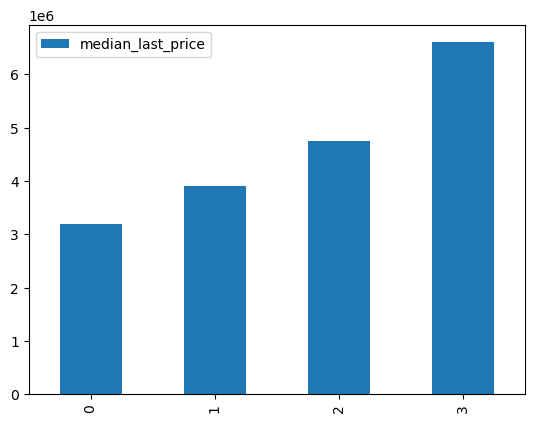

In [67]:
# строим график:
pivot_table_total_area.plot(kind='bar');

**Вывод:**  
Как показывает график, цена квартиры зависит от общей площади: чем больше общая площадь квартиры, тем выше ее цена.

#####  Зависимость цены от жилой площади

In [68]:
# делим на категории жилые площади квартир:
pd.qcut(data['living_area'], 4)

1         (18.0, 28.4]
2         (28.4, 37.7]
5        (1.999, 18.0]
6        (1.999, 18.0]
8        (1.999, 18.0]
             ...      
23692    (1.999, 18.0]
23693     (37.7, 72.2]
23695     (37.7, 72.2]
23696     (28.4, 37.7]
23698    (1.999, 18.0]
Name: living_area, Length: 19358, dtype: category
Categories (4, interval[float64, right]): [(1.999, 18.0] < (18.0, 28.4] < (28.4, 37.7] < (37.7, 72.2]]

In [69]:
# создаем категории 'жилые площади квартир' с помощью pd.qcut:
data['living_area_category'] = pd.qcut(data['living_area'], 4, 
                                      labels=['<18,6m2', '19,6-30m2',
                                              '31-42,3m2','>43,3m2'])

In [70]:
# группируем данные по новому столбцу 'living_area_category'
pivot_table_living_area = data.groupby('living_area_category').agg(
    median_last_price=('last_price', 'median')
).reset_index()

C:\Users\klime\AppData\Local\Temp\ipykernel_179672\555956660.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table_living_area = data.groupby('living_area_category').agg(


In [71]:
# формируем сводную таблицу:
pivot_table_living_area

,living_area_category,median_last_price
0,"<18,6m2",3300000.0
1,"19,6-30m2",3950000.0
2,"31-42,3m2",4680000.0
3,">43,3m2",5995000.0


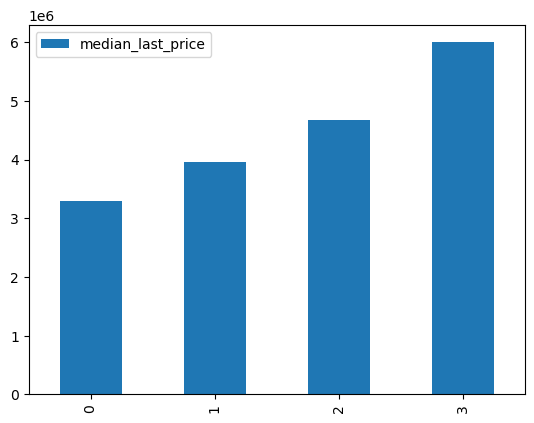

In [72]:
# строим график:
pivot_table_living_area.plot(kind='bar');

**Вывод:**  
Как показывает график, цена квартиры зависит от жилой площади: чем больше жилая площадь квартиры, тем выше ее цена.

#####  Зависимость цены от площади кухни

In [73]:
# делим на категории площади кухни квартир:
pd.qcut(data['kitchen_area'], 4)

1                     (10.8, 17.1]
2                     (6.7, 8.587]
5                    (8.587, 10.8]
6                     (10.8, 17.1]
8                    (8.587, 10.8]
                   ...            
23692    (1.2990000000000002, 6.7]
23693                 (6.7, 8.587]
23695                 (6.7, 8.587]
23696                (8.587, 10.8]
23698                (8.587, 10.8]
Name: kitchen_area, Length: 19358, dtype: category
Categories (4, interval[float64, right]): [(1.2990000000000002, 6.7] < (6.7, 8.587] < (8.587, 10.8] < (10.8, 17.1]]

In [74]:
# создаем категории 'площади кухни' с помощью pd.qcut:
data['kitchen_area_category'] = pd.qcut(data['kitchen_area'], 4, 
                                      labels=['<7m2', '8-9,1m2',
                                              '10,1-12m2','>13m2'])

In [75]:
# группируем данные по новому столбцу 'kitchen_area_category'
pivot_table_kitchen_area = data.groupby('kitchen_area_category').agg(
    median_last_price=('last_price', 'median')
).reset_index()

C:\Users\klime\AppData\Local\Temp\ipykernel_179672\49644338.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table_kitchen_area = data.groupby('kitchen_area_category').agg(


In [76]:
# формируем сводную таблицу:
pivot_table_kitchen_area

,kitchen_area_category,median_last_price
0,<7m2,3350000.0
1,"8-9,1m2",4000000.0
2,"10,1-12m2",4499499.5
3,>13m2,5950000.0


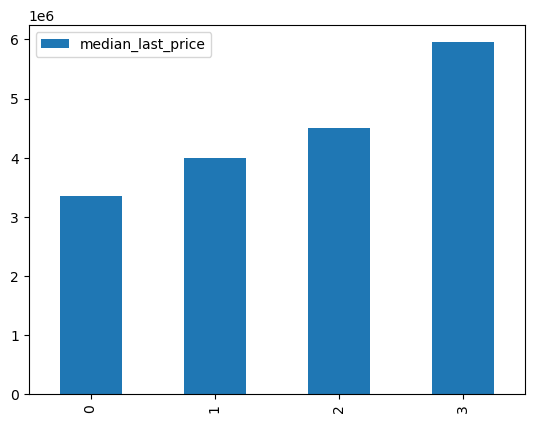

In [77]:
# строим график:
pivot_table_kitchen_area.plot(kind='bar');

**Вывод:**  
Как показывает график, цена квартиры зависит от площади кухни: чем больше площади кухни квартиры, тем выше ее цена.

#####  Зависимость цены от количества комнат

In [78]:
# обнаруживаем квартиру с 0 комнат:
data['rooms'].unique()

array([1, 2, 3, 4, 0, 5, 6], dtype=int64)

In [79]:
# предполагаем, что это однокомнатная квартира, так и запишем:
data['rooms'].replace(0, 1, inplace=True)

C:\Users\klime\AppData\Local\Temp\ipykernel_179672\1466295559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rooms'].replace(0, 1, inplace=True)


In [80]:
# создание сводной таблицы:
data_pivot_rooms = data.pivot_table(index = 'rooms', values = 'last_price',
                                    aggfunc = 'median')

In [81]:
# выборка квартир с 6 и более комнат:
data_6_or_more = data_pivot_rooms.loc[6:].median()

In [82]:
# сводная таблица квартир с 1-5 комнатами:
data_pivot_rooms = data_pivot_rooms.loc[:5]

In [83]:
# присоединение к сводной таблице квартир с 6 и более комнатами:
data_pivot_rooms.loc['6_or_more'] = data_6_or_more

In [84]:
# просмотр сводной таблицы:
data_pivot_rooms

,last_price
rooms,
1,3500000.0
2,4500000.0
3,5550000.0
4,6146000.0
5,5800000.0
6_or_more,13000000.0


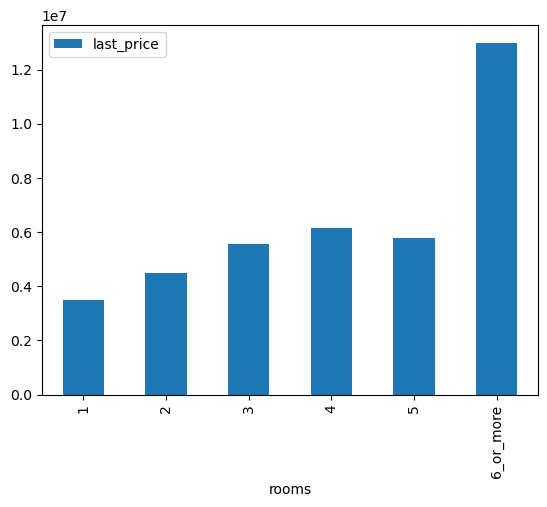

In [85]:
# строим график:
data_pivot_rooms.plot(kind='bar');

**Вывод:**  
Как показывает график, цена квартиры зависит от количества комнат: чем больше комнат, тем выше ее цена.

#####  Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

In [86]:
# формируем сводную таблицу:
data_pivot_floors_type = data.pivot_table(index = 'floor_apartment_type',
                                          values = 'last_price',
                                          aggfunc = 'median')

In [87]:
data_pivot_floors_type

,last_price
floor_apartment_type,
другой,4450000.0
первый,3600000.0
последний,3800000.0


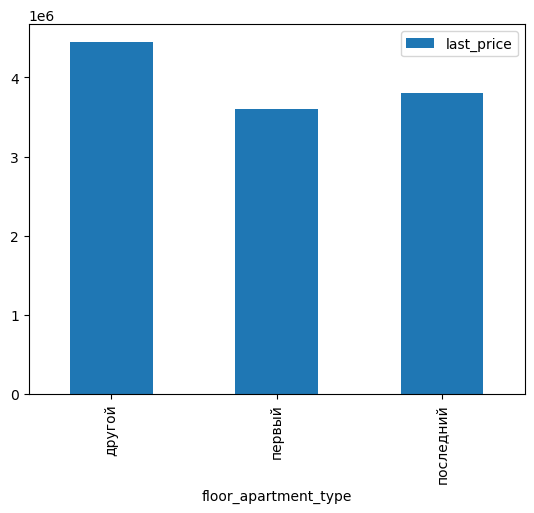

In [88]:
# строим график:
data_pivot_floors_type.plot(kind='bar');

**Вывод:**  
Как показывает график, цена квартиры на первом этаже ниже, чем на последнем этаже. В свою очередь, квартиры на последнем этаже дешевле, чем квартиры на каком-либо другом этаже. Таким образом, выгоднее приобретать квартиры на первом этаже.

#####  Зависимость цены от даты размещения (день недели, месяц, год)

*день недели размещения публикации*

In [89]:
# формируем сводную таблицу для дня недели публикации:
data_pivot_day_exposition = data.pivot_table(index = 'day_exposition',
                                          values = 'last_price',
                                          aggfunc = 'median')

In [90]:
# просматриваем сводную таблицу:
data_pivot_day_exposition

,last_price
day_exposition,
0,4275000.0
1,4250000.0
2,4300000.0
3,4200000.0
4,4200000.0
5,4250000.0
6,4250000.0


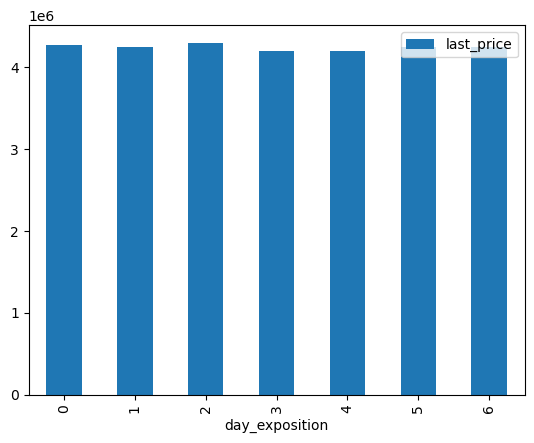

In [91]:
# строим график:
data_pivot_day_exposition.plot(kind='bar');

**Вывод:**  
Как показывает график, цены на квартиры, объявления по которым размещены по субботам и воскресеньям на 30000 ниже, чем цены на квартиры, объявления по которым опубликованы по пятницам.\
Цены на квартиры с объявлениями по пятницам ниже цен на квартиры, по которым публикации сделаны в понедельник и четверг на 1,3% (на 65000).\
Самые высокие цены на квартиры, объявления о продаже по которым сделаны по вторникам, немного ниже (на 30000) цены на квартиры с публикациями сделанными в среду.\
Таким образом, самые высокие цены на квартиры, объявления по которым размещены во вторник. 

*месяц размещения публикации*

In [92]:
# формируем сводную таблицу для месяца публикации:
data_pivot_month_exposition = data.pivot_table(index = 'month_exposition',
                                          values = 'last_price',
                                          aggfunc = 'median')

In [93]:
# просматриваем сводную таблицу:
data_pivot_month_exposition

,last_price
month_exposition,
1,4200000.0
2,4200000.0
3,4300000.0
4,4435000.0
5,4200000.0
6,4100000.0
7,4165000.0
8,4200000.0
9,4286650.0


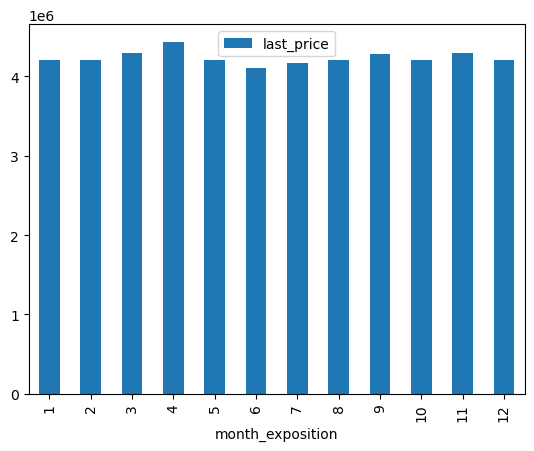

In [94]:
# строим график:
data_pivot_month_exposition.plot(kind='bar');

**Вывод:**  
Как показывает график, цены на квартиры, объявления по которым размещены в июне самые низкие.\
Самые высокие цены на квартиры, размещенные в апреле.\
Таким образом, мы наблюдаем ровную картину по ценам на квартиры с января по март, рост в апреле и снижение в мае и июне. Далее, до ноября, наблюдаются  скачки цен вверх и вниз от 1,7 до 2,7%. В декабре цены остаются на уровне ноября. 

*год размещения публикации*

In [95]:
# формируем сводную таблицу для года публикации:
data_pivot_year_exposition = data.pivot_table(index = 'year_exposition',
                                          values = 'last_price',
                                          aggfunc = 'median')

In [96]:
# просматриваем сводную таблицу:
data_pivot_year_exposition

,last_price
year_exposition,
2014,4600000.0
2015,4530000.0
2016,4150000.0
2017,4100000.0
2018,4200000.0
2019,4600000.0


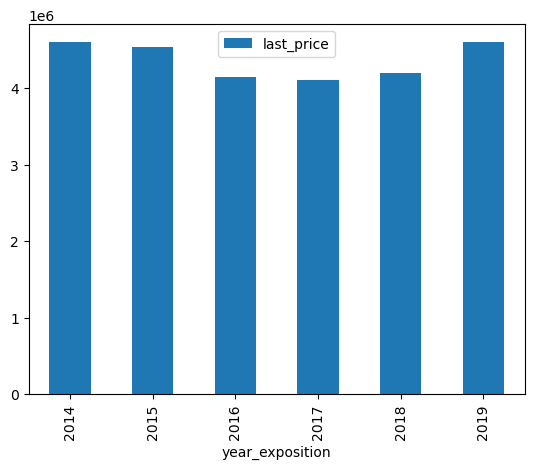

In [97]:
# строим график:
data_pivot_year_exposition.plot(kind='bar');

**Вывод:**  
Как показывает график, цены на квартиры, объявления по которым размещены в 2014 году, самые высокие.\
В 2015 году наблюдается снижение цен на 30,5%.\
В 2016 году по сравнению с 2015 годом цены снизились на 15%.\
В 2017 году наблюдается небольшое снижение - 1,1%.\
В 2018 году цены возвращаются на уровень 2016 года (рост на те же 1,1%).\
В 2019 году отмечается рост цен на 9,9% по сравнению с 2018 годом.\
Таким образом, самые высокие цены на квартиры отмечаются в 2014 году.

#### Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [98]:
# рассчитаем цену одного квадратного метра:
data['price_per_1m'] = data['last_price'] / data['total_area']

In [99]:
# группируем данные по населенным пунктам 
# и считаем средние цены квадратного метра
pivot_table_price_per_m2 = data.groupby('locality_name').agg(
    count_locality=('locality_name', 'size'),
    mean_last_price=('price_per_1m', 'mean')
).reset_index()

In [100]:
# сортируем по количеству объявлений, отбираем  10 населенных пунктов:
top_locality = pivot_table_price_per_m2.nlargest(10, 'count_locality')

In [101]:
# просматриваем сводную таблицу:
top_locality

,locality_name,count_locality,mean_last_price
32,Санкт-Петербург,12027,106292.312981
208,поселок Мурино,564,86387.283776
266,поселок Шушары,428,78710.397883
3,Всеволожск,370,68429.806038
215,поселок Парголово,313,90868.203895
13,Колпино,312,75525.535689
31,Пушкин,295,100498.051165
6,Гатчина,283,68583.229215
89,деревня Кудрово,274,93011.047104
4,Выборг,202,57427.486856


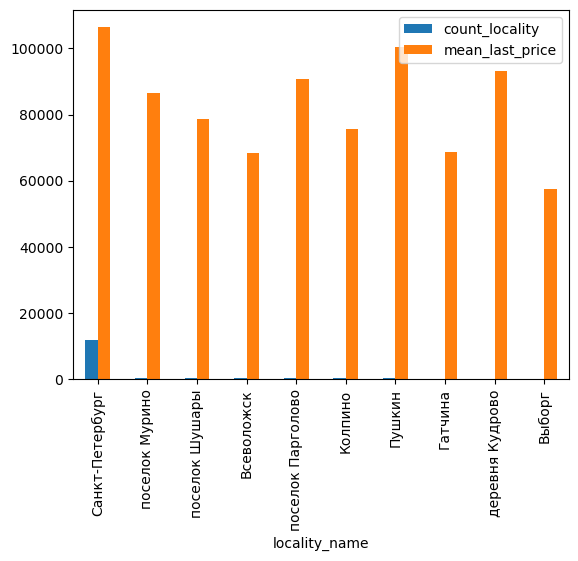

In [102]:
# строим график:
top_locality.plot(kind='bar', x='locality_name');

**Вывод:**  
Как показывает график, самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая стоимость - в Выборге.

#### Считаем среднюю стоимость квартиры в Санкт-Петербурге на разном удалении от центра

In [103]:
# находим квартиры только из Санкт-Петербурга:
apartment_in_petersburg = data[data['locality_name'] == 'Санкт-Петербург']

In [104]:
# группируем по расстоянию до центра и считаем среднюю стоимость:
avg_price_per_km = apartment_in_petersburg.groupby('cityCenters_nearest_km')['last_price'].mean().reset_index()

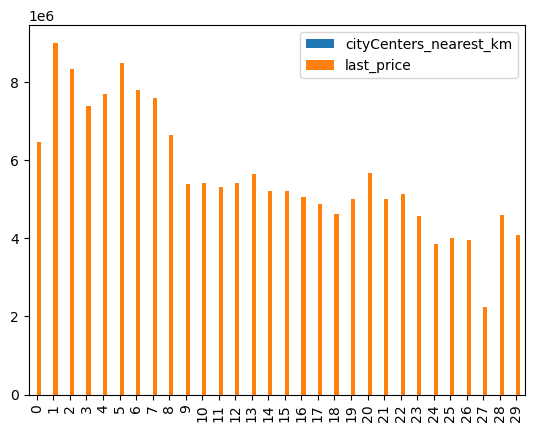

In [105]:
# строим график:
avg_price_per_km.plot(kind='bar');

**Вывод:**  
Как показывает график, средняя цена на расстоянии от центра до 1 км самая высокая. Отдаляясь от центра до 3-х км средняя цена снижается. Далее, до 6 км от центра наблюдается рост цены. Затем снова снижение до удаленности от центра до 10 км. Далее особых скачков цены не наблюдается. Заметен рост цены на расстоянии 27 км до центра города.

### Напишите общий вывод

Исходя из проведенного исследования объявлений о продаже квартир можно сделать следующие выводы:
1. Поиск и изучение пропущенных значений.\
Пропуски в данных могли возникнуть из-за того, что продавец не указал необходимую информацию или ошибся при вводе данных, а также в связи с возникновением технических неполадок в автоматическом получении информации на основе картографических данных.
2. Рассмотрение типов данных.\
Изменяем тип данных в столбцах 'parks_around3000', 'ponds_around3000' с float на int, поскольку количество парков и прудов обычно указывается в целых числах, а также преобразовываем столбец 'first_day_exposition' с object на datetime для отображения столбца как даты, а не строки.
3. Изучение параметров квартир.\
Больше всего квартир с общей площадью 30-45 м2, жилой площадью до 15-25 м2, площадью кухни до 7-9 м2, ценой до 5 млн, количеством комнат 1 комната, высотой потолков 2,6 м, типом этажа квартиры "другой" (не первый, и не последний этажи), общим количеством этажей до 5, расстоянием до центра города до 15 000 м, расстоянием до ближайшего парка до 250 м.
4. Изучение скорости продажи квартир.\
Обычно время продажи квартиры составляет до 180 дней. Продажи квартиры до 90 дней можно считать быстрыми. Продажи квартиры от 180 дней можно считать необычно долгими.
5. Определение факторов, которые больше всего влияют на общую (полную) стоимость объекта.  
- Цена квартиры зависит от общей площади: чем больше общая площадь квартиры, тем выше ее цена.
- Цена квартиры также зависит от жилой площади: чем больше жилая площадь квартиры, тем выше ее цена.
- От площади кухни цена квартиры также имеет прямую зависимость: чем больше площади кухни квартиры, тем выше ее цена.
- Также цена квартиры зависит от количества комнат: чем больше комнат, тем выше ее цена.
- Цена квартиры на первом этаже ниже, чем на последнем этаже. В свою очередь, квартиры на последнем этаже дешевле, чем квартиры на каком-либо другом этаже. Таким образом, выгоднее приобретать квартиры на первом этаже.
- Цены на квартиры, объявления по которым размещены по субботам и воскресеньям на 30000 ниже, чем цены на квартиры, объявления по которым опубликованы по пятницам. Цены на квартиры с объявлениями по пятницам ниже цен на квартиры, по которым публикации сделаны в понедельник и четверг на 1,3% (на 65000). Самые высокие цены на квартиры, объявления о продаже по которым сделаны по вторникам, немного ниже (на 30000) цены на квартиры с публикациями сделанными в среду. Таким образом, самые высокие цены на квартиры, объявления по которым размещены во вторник.
- Цены на квартиры, объявления по которым размещены в июне самые низкие. Самые высокие цены на квартиры, размещенные в апреле. Таким образом, мы наблюдаем ровную картину по ценам на квартиры с января по март, рост в апреле и снижение в мае и июне. Далее, до ноября, наблюдаются  скачки цен вверх и вниз от 1,7 до 2,7%. В декабре цены остаются на уровне ноября. 
- На квартиры, объявления по которым размещены в 2014 году, цены самые высокие. В 2015 году наблюдается снижение цен на 30,5%. В 2016 году по сравнению с 2015 годом цены снизились на 15%. В 2017 году наблюдается небольшое снижение - 1,1%. В 2018 году цены возвращаются на уровень 2016 года (рост на те же 1,1%). В 2019 году отмечается рост цен на 9,9% по сравнению с 2018 годом. Таким образом, самые высокие цены на квартиры отмечаются в 2014 году.
6. Выделение населённых пунктов с самой высокой и низкой стоимостью квадратного метра.\
Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая стоимость - в Выборге.
7. Изменение средней цены для каждого километра от центра Санкт-Петербурга.\
Средняя цена на расстоянии от центра до 1 км самая высокая. Отдаляясь от центра до 3-х км средняя цена снижается. Далее, до 6 км от центра наблюдается рост цены. Затем снова снижение до удаленности от центра до 10 км. Далее особых скачков цены не наблюдается. Заметен рост цены на расстоянии 27 км до центра города.
